In [1]:
import sojourn

In [2]:
M = sojourn.MM1PS(10, 8, infty=100)

In [6]:
M.W(1)

0.13817076911413245

In [7]:
M.W(2)

0.04401905989447897

In [8]:
import ciw

In [9]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(8)],
    service_distributions=[ciw.dists.Exponential(10)],
    number_of_servers=[float('inf')]
)

In [10]:
ciw.seed(0)
Q = ciw.Simulation(N, node_class=ciw.PSNode)
Q.simulate_until_max_time(2000)

In [11]:
recs = Q.get_all_records()

In [12]:
import scipy.stats

In [13]:
(100 - scipy.stats.percentileofscore([r.service_time for r in recs], 0)) / 100

1.0

In [14]:
(100 - scipy.stats.percentileofscore([r.service_time for r in recs], 1)) / 100

0.12459781717241811

In [15]:
(100 - scipy.stats.percentileofscore([r.service_time for r in recs], 2)) / 100

0.040943789035392086

In [16]:
xs = [0.2*i for i in range(10)]

In [17]:
experimental = [(100 - scipy.stats.percentileofscore([r.service_time for r in recs], x)) / 100 for x in xs]

In [18]:
theoretical = [M.W(x) for x in xs]

In [19]:
import matplotlib.pyplot as plt

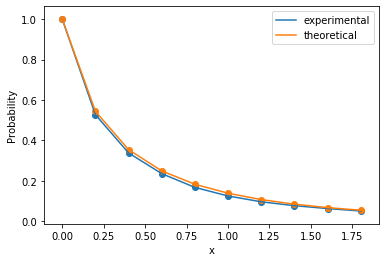

In [20]:
fig, ax = plt.subplots(1)
ax.plot(xs, experimental, label='experimental')
ax.scatter(xs, experimental)
ax.plot(xs, theoretical, label='theoretical')
ax.scatter(xs, theoretical)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('Probability')
plt.show()